In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet


#Data Loading

In [31]:
df = pd.read_csv('covid19data.csv')
df.sample(5)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
5357,2024-07-21,BZ,Belize,AMRO,1.0,71413,0.0,688
15487,2022-06-12,EC,Ecuador,AMRO,5224.0,888448,7.0,35656
9637,2023-03-05,CA,Canada,AMRO,9161.0,4601219,165.0,50964
37946,2021-02-14,MM,Myanmar,SEARO,297.0,141601,21.0,3189
39707,2020-07-12,NI,Nicaragua,AMRO,229.0,2411,8.0,91


In [32]:
df['Date_reported'] = pd.to_datetime(df['Date_reported'])

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61440 entries, 0 to 61439
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date_reported      61440 non-null  datetime64[ns]
 1   Country_code       61184 non-null  object        
 2   Country            61440 non-null  object        
 3   WHO_region         56832 non-null  object        
 4   New_cases          45533 non-null  float64       
 5   Cumulative_cases   61440 non-null  int64         
 6   New_deaths         45676 non-null  float64       
 7   Cumulative_deaths  61440 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 3.8+ MB


In [34]:
df.isna().sum()

Date_reported            0
Country_code           256
Country                  0
WHO_region            4608
New_cases            15907
Cumulative_cases         0
New_deaths           15764
Cumulative_deaths        0
dtype: int64

In [35]:
df['Country_code'] = df['Country_code'].ffill()
df = df.drop(['WHO_region'], axis=1)
df['New_cases'] = df['New_cases'].fillna(df['New_cases'].mean())
df['New_deaths'] = df['New_deaths'].fillna(df['New_deaths'].mean())

df.isna().sum()

Date_reported        0
Country_code         0
Country              0
New_cases            0
Cumulative_cases     0
New_deaths           0
Cumulative_deaths    0
dtype: int64

In [36]:
indiadf = df[df['Country'] == 'India']
indiadf.sample(5)

,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
24731,2022-12-25,IN,India,1154.0,44677106,21.0,530693
24686,2022-02-13,IN,India,443283.0,42631421,6686.0,508665
24669,2021-10-17,IN,India,114244.0,34067719,1535.0,452124
24708,2022-07-17,IN,India,127948.0,43750599,281.0,525709
24678,2021-12-19,IN,India,49765.0,34740275,1988.0,477422


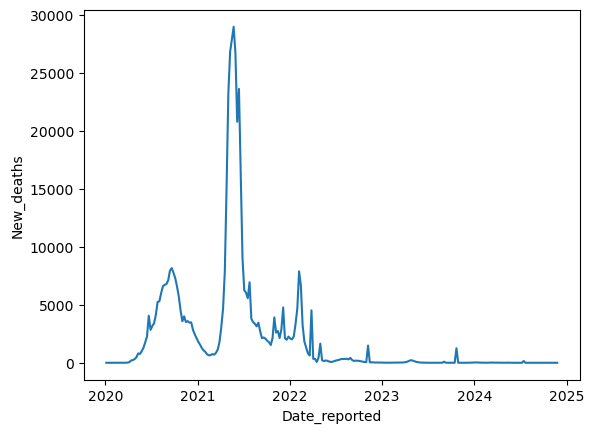

In [37]:
sns.lineplot(x='Date_reported', y='New_deaths', data=indiadf)
plt.show()

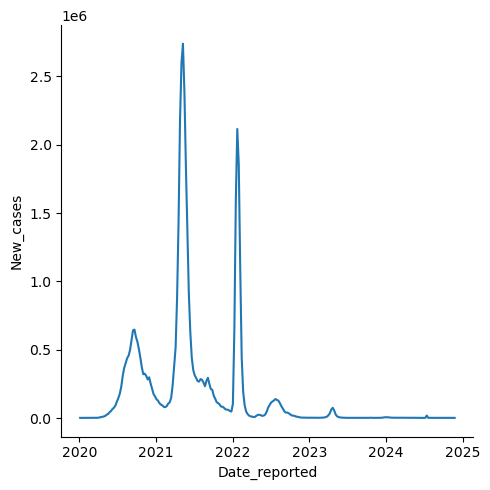

In [38]:
sns.relplot(x='Date_reported', y='New_cases', data=indiadf, kind='line')

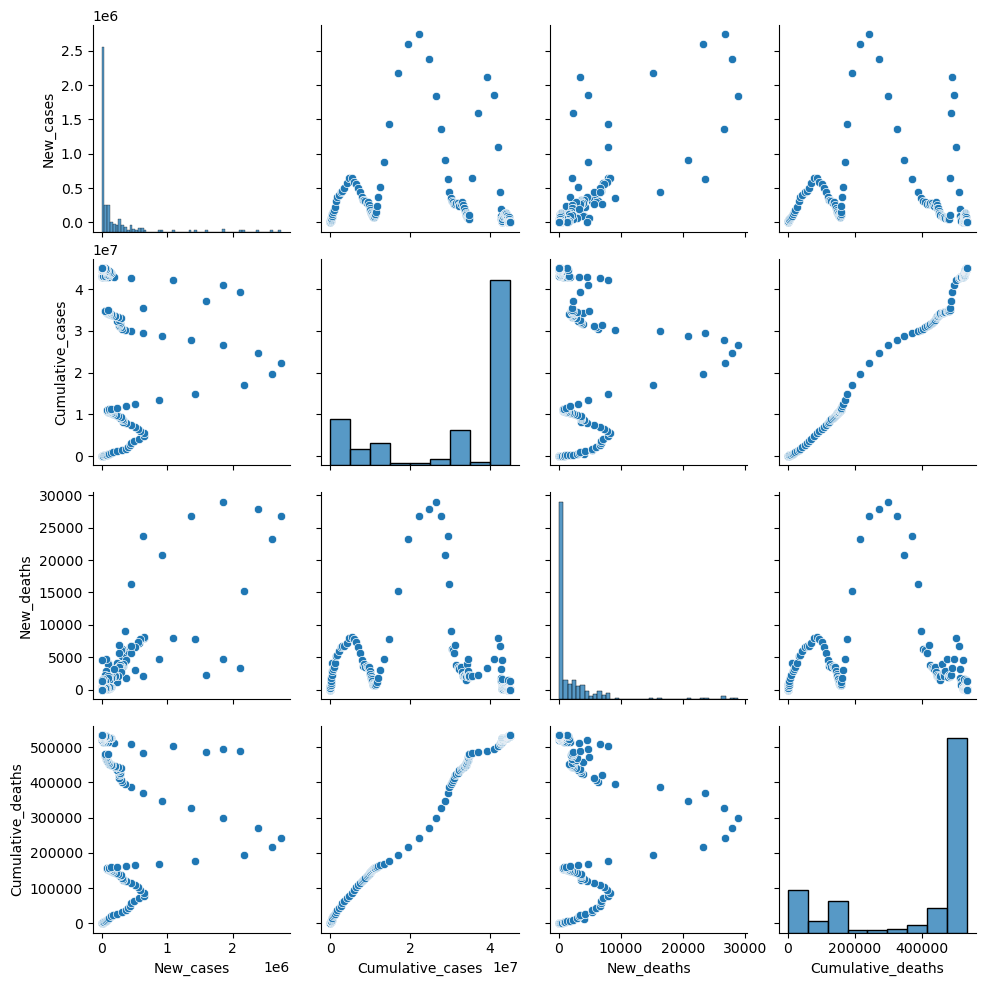

In [39]:
sns.pairplot(indiadf)

In [40]:
modeldf = pd.DataFrame()
modeldf["ds"] = df["Date_reported"]
modeldf["y"] = df["New_cases"]
modeldf['cap'] = 10000
modeldf['floor'] = 0
m = Prophet(growth='linear', n_changepoints=100)
m.fit(modeldf)
future = m.make_future_dataframe(periods=365,freq='D')
future['cap'] = 10000
future['floor'] = 0

forecast = m.predict(future)


21:31:34 - cmdstanpy - INFO - Chain [1] start processing
21:31:49 - cmdstanpy - INFO - Chain [1] done processing


<Axes: xlabel='ds', ylabel='yhat'>

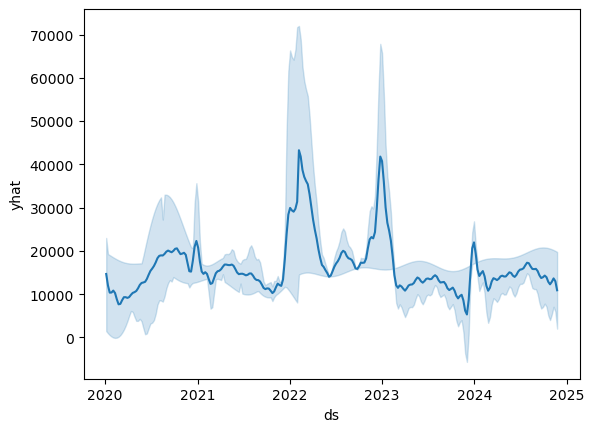

In [41]:
sns.lineplot(x=modeldf['ds'],y=forecast['yhat'])

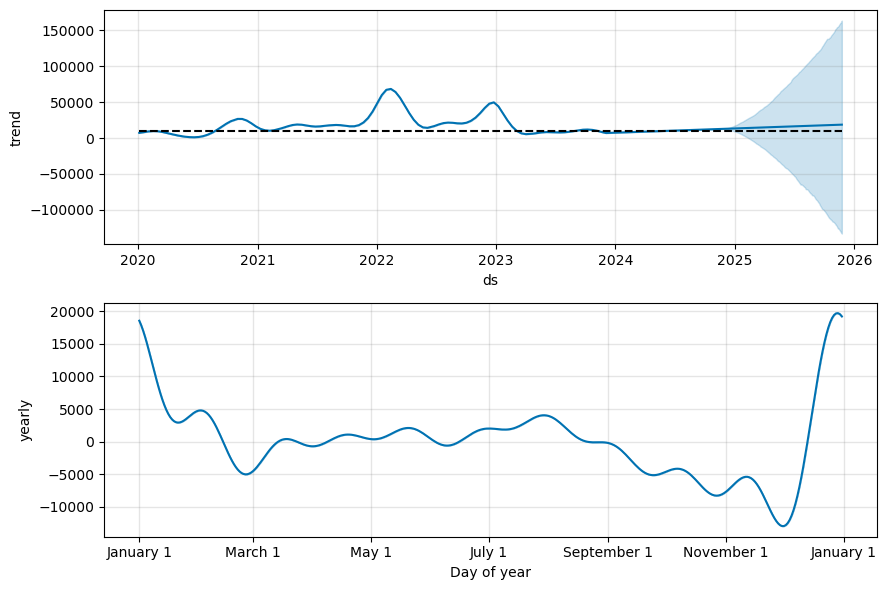

In [43]:
m.plot_components(forecast)
plt.show()